# Applied Data Science Capstone | IBM Data Science Professional Certificate

## 3. The Battle of Neighborhoods (Week 2)

# Find the Best Place to Open an Brazilian restaurant in Toronto

## 1. A description of the problem and a discussion of the background

My proposal for this project is to find the best place to open a Brazilian restaurant in Toronto. I will take advantage of the fact that I am Brazilian and I know this very special cuisine very well and use the knowledge and tools of the course to find the best place to open a new restaurant.

Choosing the right place to start a business is one of the first and very important decisions and determines important aspects in the management and development success rate.
Different factors that can directly affect the success chance of business. It is important to evaluate neighborhoods based on the factors that are important for running a successful business such as the number of competitors and the potential demand in that neighborhood. Budget limitations in renting or buying a place that plays an important role in location decision making for small businesses.

### Business Problem

There is not an exact single "national Brazilian cuisine" but there is an assortment of various regional traditions and typical dishes. This diversity is due to the origins of the people inhabiting each area and it makes this cuisine so special.
In this project, I want to find the best neighborhood in Toronto to open a Brasilian cuisine restaurant. The challenge is to find a suitable neighborhood that is close enough to some amenities and venues, has fewer competitors, and of course is affordable to rent. The restaurant is good to be near a place where many people visit such as near a cinema, park, garden, playground, and theater.

## 2. A description of the data and how it will be used to solve the problem.

I will use the Toronto data set acquired from Wikipedia last week. The data set consists of latitude and longitude, postal codes.

Foursquare API Data:
I will use Foursquare API locational information in a similar way we did las week.
Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus, and even photos.

After obtaining the list of neighborhoods, I can use the Foursquare API to collect information about places within each neighborhood.

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. Afterward, I can use the K-means clustering algorithm to find the best place to open the restaurant.

In [1]:
# Required libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geocoder --yes
import geocoder # import geocoder

#importing to plot Elbow Method
import matplotlib.pyplot as plt
%matplotlib inline

print('Libraries imported.')

Libraries imported.


## Obtain Table from Wikipedia

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
toronto_df = pd.read_html(url)
toronto_df = toronto_df[0]

In [3]:
# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

toronto_df = toronto_df[toronto_df.Borough != "Not assigned"] # Remove Boroughs that are 'Not assigned'

In [4]:
# More than one neighborhood can exist in one postal code area.
# These two rows will be combined into one row with the neighborhoods separated with a comma.

toronto_df["Neighbourhood"] = toronto_df.groupby("Postcode")["Neighbourhood"].transform(lambda neigh: ', '.join(neigh))

toronto_df = toronto_df.drop_duplicates()

toronto_df = toronto_df.reset_index(drop=True) # just reseting the index because I have obsessive compulsive disorder

In [5]:
# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

toronto_df['Neighbourhood'].replace("Not assigned", toronto_df["Borough"], inplace = True)

toronto_df.columns = ["PostalCode", "Borough", "Neighborhood"]

toronto_df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [6]:
toronto_df.shape

(103, 3)

## Add longitude and latitude to Data Table

In [7]:
# we need to get the latitude and the longitude coordinates of each neighborhood

geospatial_data = pd.read_csv("https://cocl.us/Geospatial_data")

In [8]:
toronto_df_ll = toronto_df.join(geospatial_data.set_index('Postal Code'), on = 'PostalCode')
# toronto_df_ll is a new data frame to not spoil the previous

In [9]:
# Rename the columns
toronto_df_ll.columns = ["PostalCode", "Borough", "Neighborhood", "Latitude", "Longitude"]

In [10]:
toronto_df_ll.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494


In [11]:
toronto_df_ll.shape

(103, 5)

## Explore and cluster the neighborhoods in Toronto

Use geopy library to get the latitude and longitude values of Toronto.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>canada_explorer</em>, as shown below.

In [12]:
address = 'Toronto'

geolocator = Nominatim(user_agent = "canada_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [13]:
# I decide to work with only boroughs that contain the word Toronto.

df_only_toronto = toronto_df_ll[toronto_df_ll['Borough'].str.contains('Toronto')]
# df_only_toronto is a new data frame to not spoil the previous

# just reseting the index because I have obsessive compulsive disorder
df_only_toronto = df_only_toronto.reset_index(drop = True)

In [14]:
df_only_toronto.shape

(39, 5)

In [16]:
map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 12)

# add markers to map
for lat, lng, borough, toronto_df_ll in zip(df_only_toronto['Latitude'], df_only_toronto['Longitude'],
                                            df_only_toronto['Borough'], df_only_toronto['Neighborhood']):
    label = '{}, {}'.format(df_only_toronto, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color ='#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_toronto)  
    
map_toronto

Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = 'RLMF1PEWLTCDNVPKGIJOA2QIFSL1WJYXPWUR0MGFBGSBEREP' # your Foursquare ID
CLIENT_SECRET = 'VYALR130GX51ZTLUGCDHRMQ2PFFRLJTARDWCYEVO0FAZCWCE' # your Foursquare Secret
VERSION = '20200225' # Foursquare API version
print('my credentials were defined successfully')

my credentials were defined successfully


## Explore Neighborhoods in Toronto

Let's create a function to generalize venue data collection of Toronto's Neighborhoods

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now it's just to run the above function on each neighborhood and create a new dataframe called toronto_venues

In [21]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

toronto_venues = getNearbyVenues(names = df_only_toronto['Neighborhood'],
                                 latitudes = df_only_toronto['Latitude'],
                                 longitudes = df_only_toronto['Longitude']
                                )

In [20]:
toronto_venues.shape

(1719, 7)

In [21]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Harbourfront,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Harbourfront,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


Let's find out how many unique categories can be curated from all the returned venues

In [22]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


## Analyze Each Neighborhood

In [23]:
# one hot encoding to change to 0 and 1 venues categories separately
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# I drop this column because for some reason there is a Neighborhood Venue Category 
# that later causes some problems in groupby method
toronto_onehot.drop(["Neighborhood"], axis = 1, inplace = True)

# add neighborhood column in the first column
toronto_onehot.insert(0, "Neighborhood", toronto_venues['Neighborhood'], True)

In [24]:
toronto_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [25]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [26]:
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,0.0,0.000000,0.0,0.02,0.0,0.000000,0.000000,0.0,0.000000,0.020000,0.0,0.030000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.02,0.000000,0.01,0.020000,0.000000,0.0,0.01,0.01,0.010000,0.0,0.000000,0.040000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.01,0.000000,0.070000,0.0,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.00,0.02,0.0,0.0,0.000000,0.0,0.0,0.0,0.01,0.010000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.010000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.01,0.0,0.000000,0.000000,0.0

Let's put the top 10 most common venues into a *pandas* dataframe. 
But firstf let's write a function to sort the venues in descending order.

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe of the top 10 venues for each neighborhood.

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind + 1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

In [30]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Restaurant,Thai Restaurant,Café,Bar,Steakhouse,Sushi Restaurant,Concert Hall,Seafood Restaurant,Bakery
1,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Seafood Restaurant,Restaurant,Farmers Market,Café,Cheese Shop,Comfort Food Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Café,Performing Arts Venue,Nightclub,Coffee Shop,Breakfast Spot,Bakery,Pet Store,Climbing Gym,Restaurant,Burrito Place
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Skate Park,Brewery,Spa,Burrito Place,Farmers Market,Fast Food Restaurant,Restaurant,Light Rail Station
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Boutique,Harbor / Marina,Boat or Ferry,Bar,Coffee Shop,Plane,Sculpture Garden,Airport Terminal


In [31]:
neighborhoods_venues_sorted.shape

(39, 11)

## Cluster Neighborhoods

Run *k*-means to cluster the neighborhoods and find the best k to the model.

In [32]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

Let's use the elbow method for optimal k

In [36]:
sum_of_squared_distances = []
K = range(1,38)
for k in K:
    km = KMeans(n_clusters = k).fit(toronto_grouped_clustering)
    sum_of_squared_distances.append(km.inertia_)

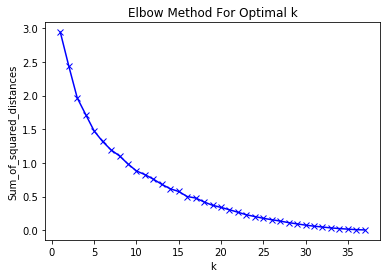

In [37]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [49]:
# set number of clusters based on Elbow Method for optimal k
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters).fit(toronto_grouped_clustering)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_only_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

In [52]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,"Adelaide, King, Richmond",Coffee Shop,Restaurant,Thai Restaurant,Café,Bar,Steakhouse,Sushi Restaurant,Concert Hall,Seafood Restaurant,Bakery
1,3,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Seafood Restaurant,Restaurant,Farmers Market,Café,Cheese Shop,Comfort Food Restaurant
2,0,"Brockton, Exhibition Place, Parkdale Village",Café,Performing Arts Venue,Nightclub,Coffee Shop,Breakfast Spot,Bakery,Pet Store,Climbing Gym,Restaurant,Burrito Place
3,3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Skate Park,Brewery,Spa,Burrito Place,Farmers Market,Fast Food Restaurant,Restaurant,Light Rail Station
4,3,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Boutique,Harbor / Marina,Boat or Ferry,Bar,Coffee Shop,Plane,Sculpture Garden,Airport Terminal
5,3,"Cabbagetown, St. James Town",Coffee Shop,Restaurant,Café,Pizza Place,Italian Restaurant,Convenience Store,Pub,Bakery,Caribbean Restaurant,Playground
6,3,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Juice Bar,Burger Joint,Japanese Restaurant,Ice Cream Shop,Department Store,Dessert Shop,Thai Restaurant
7,3,"Chinatown, Grange Park, Kensington Market",Bar,Vietnamese Restaurant,Café,Chinese Restaurant,Coffee Shop,Bakery,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Burger Joint
8,0,Christie,Grocery Store,Café,Park,Coffee Shop,Italian Restaurant,Diner,Restaurant,Candy Store,Athletics & Sports,Baby Store
9,3,Church and Wellesley,Coffee Shop,Japanese Restaurant,Restaurant,Sushi Restaurant,Gay Bar,Hotel,Bubble Tea Shop,Burger Joint,Men's Store,Café


Finally, let's visualize the resulting clusters

In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Methodology <a name="methodology"></a>

After use K-Means algorithm, lets analize the results in terms of clusters.

In [59]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Downtown Toronto,0,Grocery Store,Café,Park,Coffee Shop,Italian Restaurant,Diner,Restaurant,Candy Store,Athletics & Sports,Baby Store
14,West Toronto,0,Café,Performing Arts Venue,Nightclub,Coffee Shop,Breakfast Spot,Bakery,Pet Store,Climbing Gym,Restaurant,Burrito Place
22,West Toronto,0,Park,Mexican Restaurant,Bar,Thai Restaurant,Café,Arts & Crafts Store,Fast Food Restaurant,Bakery,Italian Restaurant,Speakeasy
27,Downtown Toronto,0,Café,Bar,Italian Restaurant,Japanese Restaurant,Bookstore,Restaurant,Bakery,Chinese Restaurant,Beer Bar,Beer Store


In [60]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,1,Pool,Garden,Yoga Studio,Department Store,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [61]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,2,Park,Playground,Restaurant,Tennis Court,Comic Shop,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,3,Coffee Shop,Bakery,Pub,Park,Café,Breakfast Spot,Theater,Restaurant,Mexican Restaurant,Distribution Center
1,Downtown Toronto,3,Coffee Shop,Park,Beer Bar,Sandwich Place,Burger Joint,Burrito Place,Restaurant,Café,Portuguese Restaurant,Chinese Restaurant
2,Downtown Toronto,3,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Café,Japanese Restaurant,Burger Joint,Electronics Store,Bubble Tea Shop,Plaza,Cosmetics Shop
3,Downtown Toronto,3,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Breakfast Spot,Beer Bar,Cosmetics Shop,Bakery,Clothing Store
5,Downtown Toronto,3,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Seafood Restaurant,Restaurant,Farmers Market,Café,Cheese Shop,Comfort Food Restaurant
6,Downtown Toronto,3,Coffee Shop,Italian Restaurant,Sandwich Place,Juice Bar,Burger Joint,Japanese Restaurant,Ice Cream Shop,Department Store,Dessert Shop,Thai Restaurant
8,Downtown Toronto,3,Coffee Shop,Restaurant,Thai Restaurant,Café,Bar,Steakhouse,Sushi Restaurant,Concert Hall,Seafood Restaurant,Bakery
10,Downtown Toronto,3,Coffee Shop,Aquarium,Hotel,Italian Restaurant,Café,Brewery,Scenic Lookout,Fried Chicken Joint,Sporting Goods Shop,Restaurant
11,West Toronto,3,Bar,Coffee Shop,Asian Restaurant,Restaurant,Men's Store,Pizza Place,Wine Bar,Vietnamese Restaurant,Bakery,Café
12,East Toronto,3,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Frozen Yogurt Shop,Pub,Pizza Place,Lounge,Liquor Store


In [63]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,4,Jewelry Store,Trail,Sushi Restaurant,Mexican Restaurant,Yoga Studio,Dim Sum Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [64]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,5,Dim Sum Restaurant,Park,Swim School,Bus Line,Yoga Studio,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [65]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Central Toronto,6,Park,Hotel,Breakfast Spot,Sandwich Place,Dog Run,Food & Drink Shop,Department Store,Gym,Costume Shop,Coworking Space


In [66]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,West Toronto,7,Bakery,Pharmacy,Middle Eastern Restaurant,Café,Bar,Bank,Recording Studio,Brewery,Pool,Supermarket


In [67]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 8, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,East Toronto,8,Trail,Pub,Health Food Store,Yoga Studio,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant


In [68]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 9, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Downtown Toronto,9,Park,Playground,Trail,Yoga Studio,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


## Results and Discussion <a name="results"></a>

Looking at the results in terms of clusters, the best places to open a Brazilian restaurant would be clusters 4 to 9, as they are the ones with the least amount of restaurants. Other criteria need and should be analyzed, like other places that people usually go before going to a restaurant and the competition from other restaurants.

## Conclusion <a name="conclusion"></a>

The purpose of this project was to identify Toronto areas with a low number of restaurants in order to search for the optimal locations for a new Brasilian restaurant. From Foursquare data we have first identified general boroughs and then clustering of those locations was then performed in order to create major zones of interest.
The final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like the attractiveness of each location, prices, social and economic dynamics of every neighborhood, etc.